In [ ]:
#load model resnet
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import kagglehub

ModuleNotFoundError: No module named 'kagglehub'

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
new_model = tf.keras.models.load_model('cabbage.keras')
path = kagglehub.dataset_download("swoyam2609/fresh-and-stale-classification")

print("Path to dataset files:", path)

I0000 00:00:1731917357.727903   92432 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21885 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


Path to dataset files: /home/sugeng/.cache/kagglehub/datasets/swoyam2609/fresh-and-stale-classification/versions/1


In [ ]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1024)             │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,665,026 (97.90 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [ ]:
# pred single image

label = ['freshapples', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'freshcucumber', 'freshokra', 'freshoranges', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottenbittergroud', 'rottencapsicum', 'rottencucumber', 'rottenokra', 'rottenoranges', 'rottenpotato', 'rottentomato']
four_class_labels = ['freshcabbage', 'freshapples', 'freshbanana', 'freshcapsicum',   'freshtomato', 'rottencabbage','rottenapples', 'rottenbanana', 'rottencapsicum',  'rottentomato']
Freshness = ['Fresh', 'Rotten']
img_path = '/home/sugeng/Downloads/4k.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = new_model.predict(img_array)
for i, lbl in enumerate(Freshness):
    print(f'{lbl}: {predictions[0][i]:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Fresh: 0.9996
Rotten: 0.0004


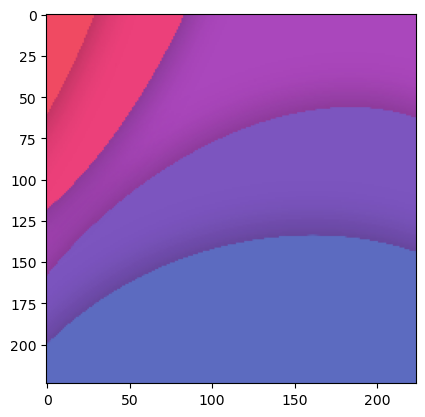

In [9]:
plt.imshow(img)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


test_ds = image_dataset_from_directory(
    path+'/dataset/Test',
    label_mode='categorical',
    color_mode='rgb',
    seed=1337,
    image_size=(224, 224),
    batch_size=32,
)

print(test_ds.class_names)

test_label = test_ds.class_names

Found 4179 files belonging to 6 classes.
['freshapples', 'freshbanana', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottentomato']


2024-11-13 14:38:57.205441: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1498', 100 bytes spill stores, 100 bytes spill loads

2024-11-13 14:38:57.213791: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1491_0', 112 bytes spill stores, 224 bytes spill loads

2024-11-13 14:38:57.232102: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1498', 444 bytes spill stores, 444 bytes spill loads

2024-11-13 14:38:57.264083: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1491', 220 bytes spill stores, 576 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━

2024-11-13 14:39:04.989740: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1491_0', 8 bytes spill stores, 8 bytes spill loads

2024-11-13 14:39:05.116382: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1491', 16 bytes spill stores, 16 bytes spill loads

2024-11-13 14:39:05.167097: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1491', 20 bytes spill stores, 20 bytes spill loads

2024-11-13 14:39:05.216421: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1498', 184 bytes spill stores, 184 bytes spill loads

2024-11-13 14:39:05.280389: I external/local_xla/xla/strea

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


2024-11-13 14:39:06.457497: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


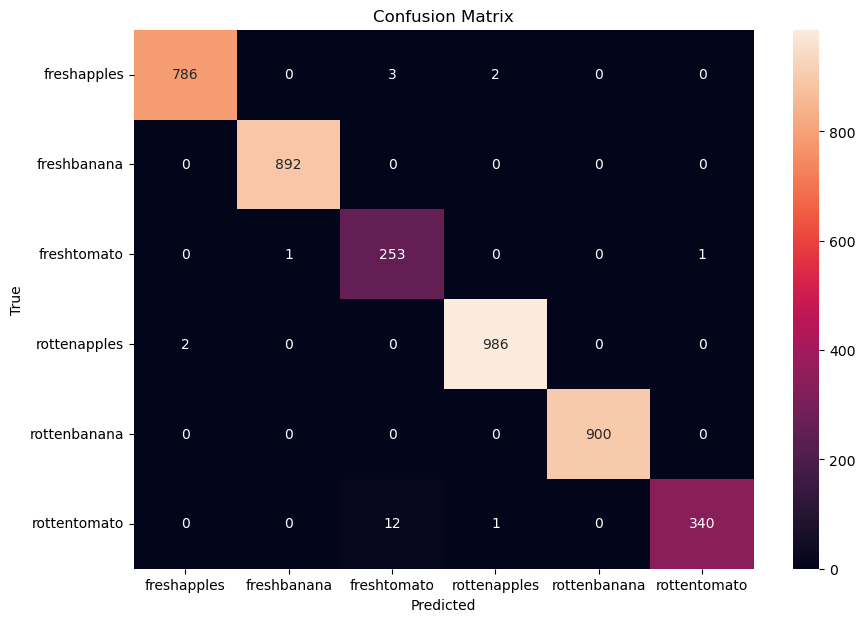

In [ ]:
# Evaluate per label manually 
y_pred = []
y_true = []
for images, labels in test_ds:
    predictions = new_model.predict(images)
    for i, label in enumerate(labels):
        y_true.append(np.argmax(label))
        y_pred.append(np.argmax(predictions[i][[1, 2, 4, 6, 7, 9]]))
        
cm = confusion_matrix(y_true, y_pred)

        
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_label, yticklabels=test_label)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Overall acc, f1, precision, recall
print(classification_report(y_true, y_pred, target_names=test_label))

              precision    recall  f1-score   support

 freshapples       1.00      0.99      1.00       791
 freshbanana       1.00      1.00      1.00       892
 freshtomato       0.94      0.99      0.97       255
rottenapples       1.00      1.00      1.00       988
rottenbanana       1.00      1.00      1.00       900
rottentomato       1.00      0.96      0.98       353

    accuracy                           0.99      4179
   macro avg       0.99      0.99      0.99      4179
weighted avg       0.99      0.99      0.99      4179



In [10]:
#Reset GPU memory (always do this after training)
from numba import cuda 
device = cuda.get_current_device()
device.reset()